# EDA: Ames Housing Price Predictor

Exploratory Data Analysis of the Ames Housing dataset for the housing price predictor. `train.csv`

## Phase 1: Data Overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

df = pd.read_csv('Data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
print('Shape:', df.shape)
print()
df.info()

Shape: (1460, 81)

<class 'pandas.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   str    
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   str    
 6   Alley          91 non-null     str    
 7   LotShape       1460 non-null   str    
 8   LandContour    1460 non-null   str    
 9   Utilities      1460 non-null   str    
 10  LotConfig      1460 non-null   str    
 11  LandSlope      1460 non-null   str    
 12  Neighborhood   1460 non-null   str    
 13  Condition1     1460 non-null   str    
 14  Condition2     1460 non-null   str    
 15  BldgType       1460 non-null   str    
 16  HouseStyle     1460 non-null   str    
 17  OverallQual    1460 non-null   int64  
 18  

In [3]:
# Split into numeric vs categorical
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print('Numeric columns:', len(numeric_cols))
print(numeric_cols)
print()
print('Categorical columns:', len(categorical_cols))
print(categorical_cols)

Numeric columns: 38
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

Categorical columns: 43
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'Fire

/var/folders/d9/cgypymwn2tj96mmjdmrs_2xr0000gn/T/ipykernel_5998/2902366671.py:3: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = df.select_dtypes(include=['object']).columns.tolist()


In [4]:
# Note: MSSubClass is numeric but semantically categorical (dwelling type codes)
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1460.0,NaN,NaN,NaN,730.5,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,NaN,NaN,NaN,56.89726,42.300571,20.0,20.0,50.0,70.0,190.0
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1201.0,NaN,NaN,NaN,70.049958,24.284752,21.0,59.0,69.0,80.0,313.0
LotArea,1460.0,NaN,NaN,NaN,10516.828082,9981.264932,1300.0,7553.5,9478.5,11601.5,215245.0
...,...,...,...,...,...,...,...,...,...,...,...
MoSold,1460.0,NaN,NaN,NaN,6.321918,2.703626,1.0,5.0,6.0,8.0,12.0
YrSold,1460.0,NaN,NaN,NaN,2007.815753,1.328095,2006.0,2007.0,2008.0,2009.0,2010.0
SaleType,1460,9,WD,1267,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SaleCondition,1460,6,Normal,1198,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Phase 2: Data Quality

In [5]:
# Missing values - pandas reads empty cells as NaN; "NA" strings may appear in object columns
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing_pct = (missing / len(df) * 100).round(2)
pd.DataFrame({'Missing Count': missing, 'Missing %': missing_pct})

,Missing Count,Missing %
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
MasVnrType,872,59.73
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


In [6]:
# Check for string 'NA' (semantic NA - means "none" in Ames data)
for col in categorical_cols:
    na_count = (df[col] == 'NA').sum()
    if na_count > 0:
        print(f"{col}: {na_count} occurrences of string 'NA' (semantic: no feature)")

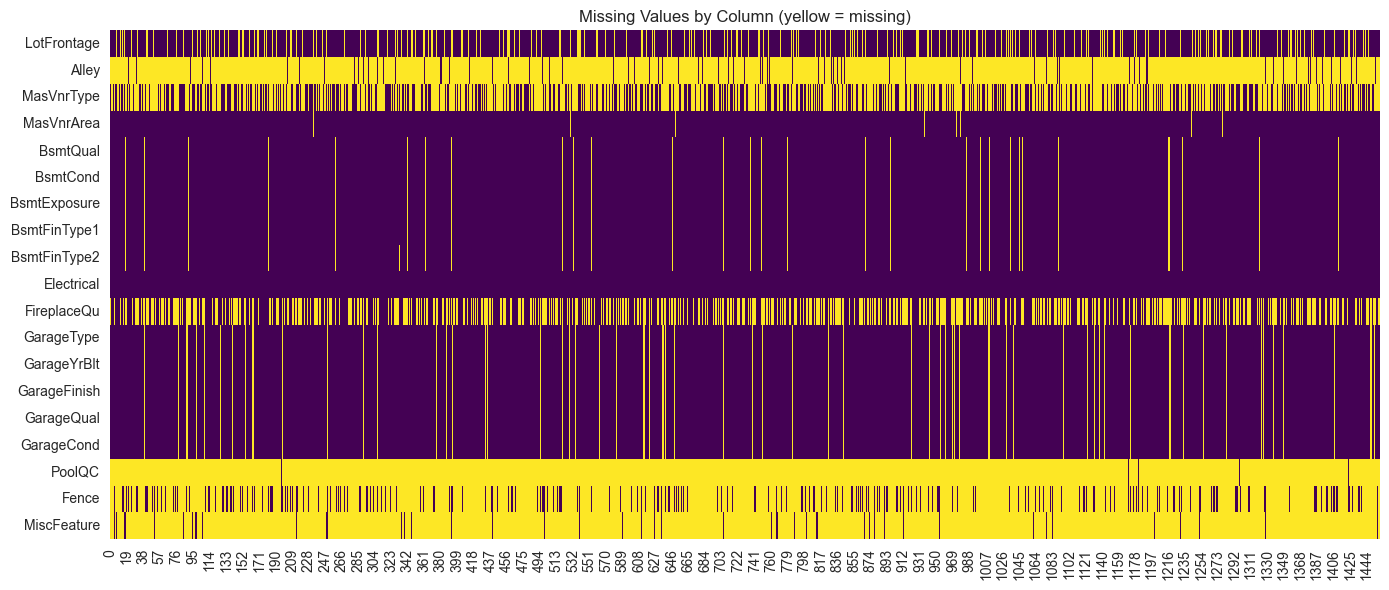

In [7]:
# Heatmap of missing values (columns with any missing)
cols_with_missing = df.columns[df.isnull().any()].tolist()
if cols_with_missing:
    plt.figure(figsize=(14, 6))
    sns.heatmap(df[cols_with_missing].isnull().T, cbar=False, yticklabels=cols_with_missing, cmap='viridis')
    plt.title('Missing Values by Column (yellow = missing)')
    plt.tight_layout()
    plt.show()

In [8]:
# Duplicates and Id uniqueness
print('Duplicate rows:', df.duplicated().sum())
print('Id unique:', df['Id'].is_unique)
print('Total rows:', len(df))

Duplicate rows: 0
Id unique: True
Total rows: 1460


## Phase 3: Target (SalePrice) Analysis

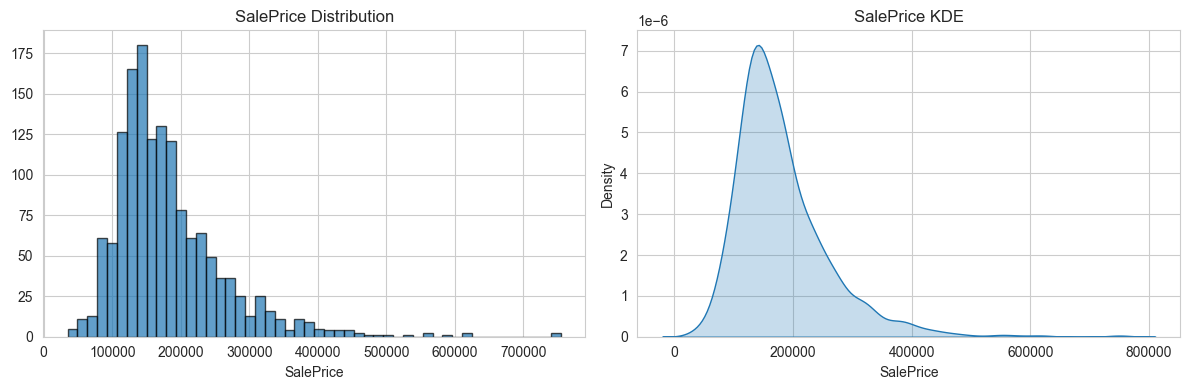

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(df['SalePrice'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('SalePrice Distribution')
axes[0].set_xlabel('SalePrice')

sns.kdeplot(df['SalePrice'], ax=axes[1], fill=True)
axes[1].set_title('SalePrice KDE')
axes[1].set_xlabel('SalePrice')
plt.tight_layout()
plt.show()

In [10]:
skew = df['SalePrice'].skew()
print(f'SalePrice skewness: {skew:.3f}')
print('(Values > 1 indicate strong right skew; log transform often helps)')

SalePrice skewness: 1.883
(Values > 1 indicate strong right skew; log transform often helps)


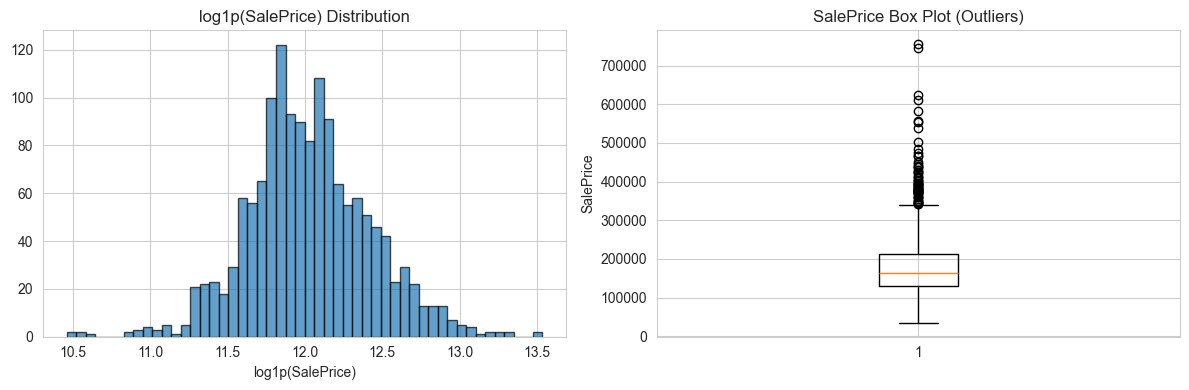

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(np.log1p(df['SalePrice']), bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('log1p(SalePrice) Distribution')
axes[0].set_xlabel('log1p(SalePrice)')

axes[1].boxplot(df['SalePrice'])
axes[1].set_title('SalePrice Box Plot (Outliers)')
axes[1].set_ylabel('SalePrice')
plt.tight_layout()
plt.show()

In [12]:
# IQR-based outliers
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outliers = df[(df['SalePrice'] < lower) | (df['SalePrice'] > upper)]
print(f'IQR bounds: [{lower:.0f}, {upper:.0f}]')
print(f'Outliers (IQR rule): {len(outliers)} ({100*len(outliers)/len(df):.1f}%)')

IQR bounds: [3938, 340038]
Outliers (IQR rule): 61 (4.2%)


## Phase 4: Feature Exploration

### Numeric features

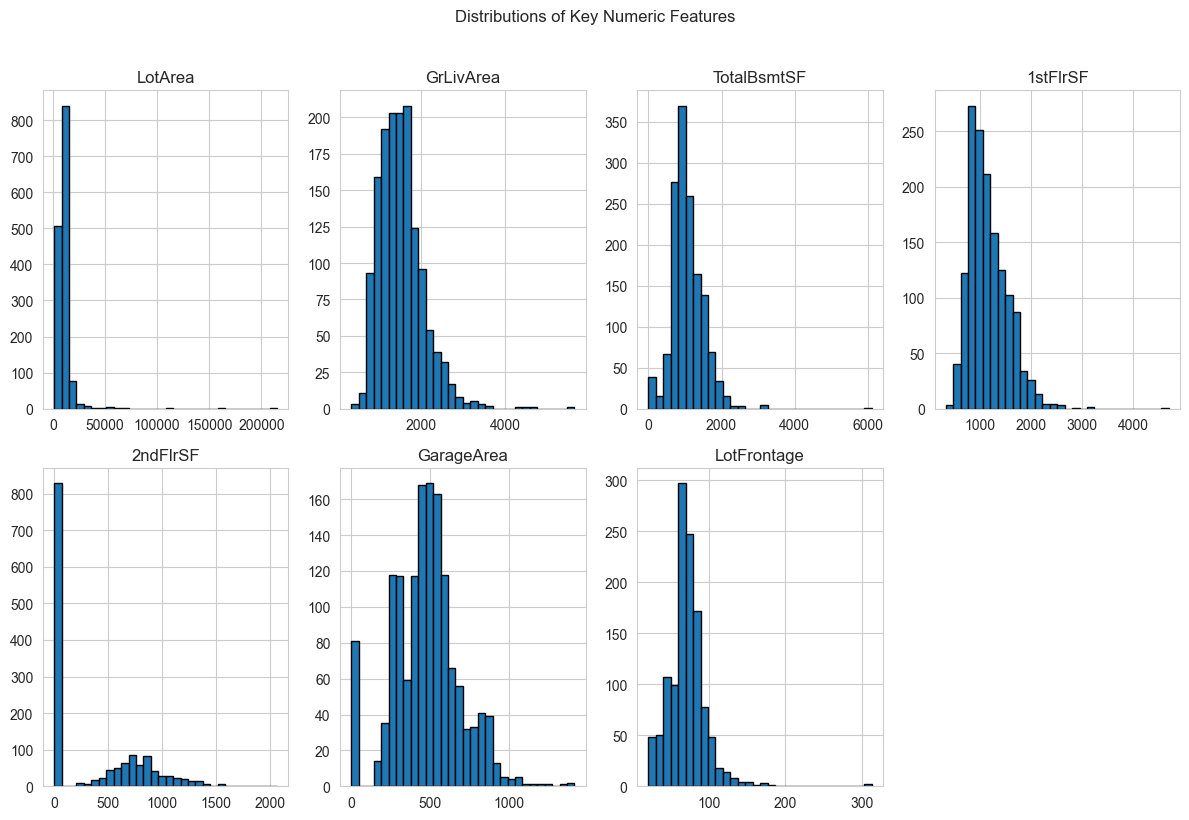

In [13]:
# Key continuous numeric columns
key_numeric = ['LotArea', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageArea', 'LotFrontage']
key_numeric = [c for c in key_numeric if c in df.columns]

df[key_numeric].hist(bins=30, figsize=(12, 8), layout=(2, 4), edgecolor='black')
plt.suptitle('Distributions of Key Numeric Features', y=1.02)
plt.tight_layout()
plt.show()

In [14]:
# Correlation matrix (numeric only) - focus on SalePrice
corr = df.select_dtypes(include=[np.number]).corr()
sale_corr = corr['SalePrice'].drop('SalePrice').sort_values(ascending=False)
print('Correlation with SalePrice (top 15):')
print(sale_corr.head(15))
print()
print('Correlation with SalePrice (bottom 5):')
print(sale_corr.tail(5))

Correlation with SalePrice (top 15):
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
Name: SalePrice, dtype: float64

Correlation with SalePrice (bottom 5):
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


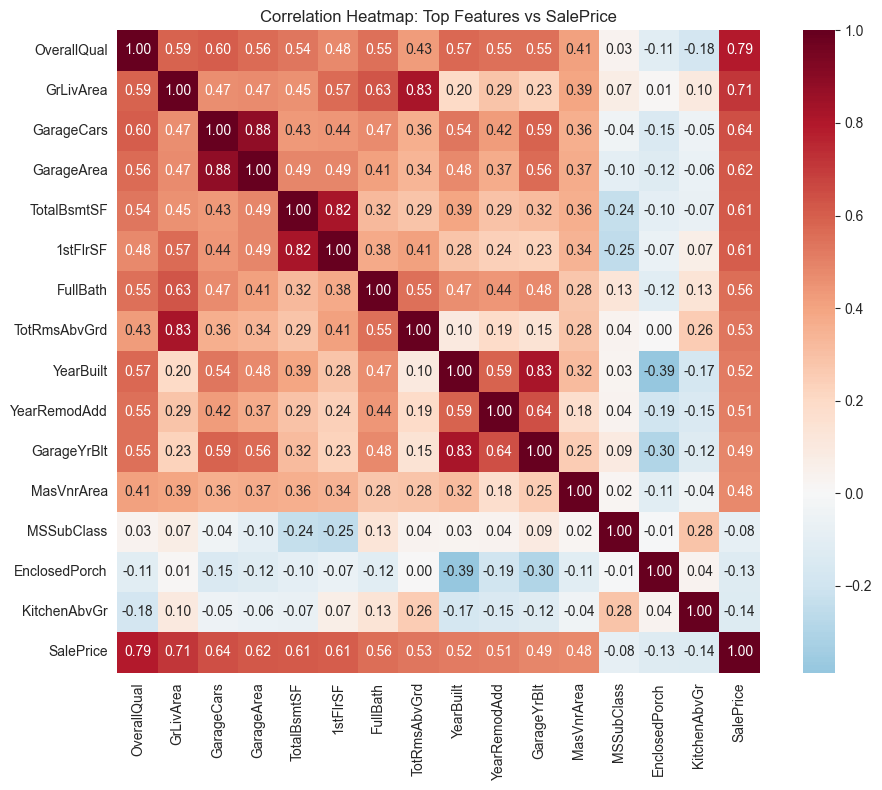

In [15]:
# Heatmap - top correlated features with SalePrice
top_corr_cols = sale_corr.head(12).index.tolist() + sale_corr.tail(3).index.tolist()
top_corr_cols = list(dict.fromkeys(top_corr_cols + ['SalePrice']))
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_corr_cols].corr(), annot=True, fmt='.2f', cmap='RdBu_r', center=0, square=True)
plt.title('Correlation Heatmap: Top Features vs SalePrice')
plt.tight_layout()
plt.show()

In [16]:
# High multicollinearity pairs (e.g. GarageCars vs GarageArea, TotalBsmtSF vs 1stFlrSF)
print('Sample high correlations (excluding SalePrice and Id):')
corr_no_target = corr.drop(columns=['SalePrice', 'Id'], errors='ignore').drop(index=['SalePrice', 'Id'], errors='ignore')
for i in range(len(corr_no_target.columns)):
    for j in range(i+1, len(corr_no_target.columns)):
        val = corr_no_target.iloc[i, j]
        if abs(val) > 0.8:
            print(f"  {corr_no_target.columns[i]} vs {corr_no_target.columns[j]}: {val:.2f}")

Sample high correlations (excluding SalePrice and Id):
  YearBuilt vs GarageYrBlt: 0.83
  TotalBsmtSF vs 1stFlrSF: 0.82
  GrLivArea vs TotRmsAbvGrd: 0.83
  GarageCars vs GarageArea: 0.88


### Categorical features

In [17]:
# Cardinality
card = df[categorical_cols].nunique().sort_values(ascending=False)
print('Categorical column cardinality:')
print(card)

Categorical column cardinality:
Neighborhood     25
Exterior2nd      16
Exterior1st      15
SaleType          9
Condition1        9
Condition2        8
HouseStyle        8
RoofMatl          8
Functional        7
BsmtFinType2      6
Heating           6
RoofStyle         6
SaleCondition     6
BsmtFinType1      6
GarageType        6
Foundation        6
Electrical        5
FireplaceQu       5
HeatingQC         5
GarageQual        5
GarageCond        5
MSZoning          5
LotConfig         5
ExterCond         5
BldgType          5
BsmtExposure      4
MiscFeature       4
Fence             4
LotShape          4
LandContour       4
BsmtCond          4
KitchenQual       4
ExterQual         4
BsmtQual          4
LandSlope         3
GarageFinish      3
MasVnrType        3
PavedDrive        3
PoolQC            3
Utilities         2
CentralAir        2
Street            2
Alley             2
dtype: int64


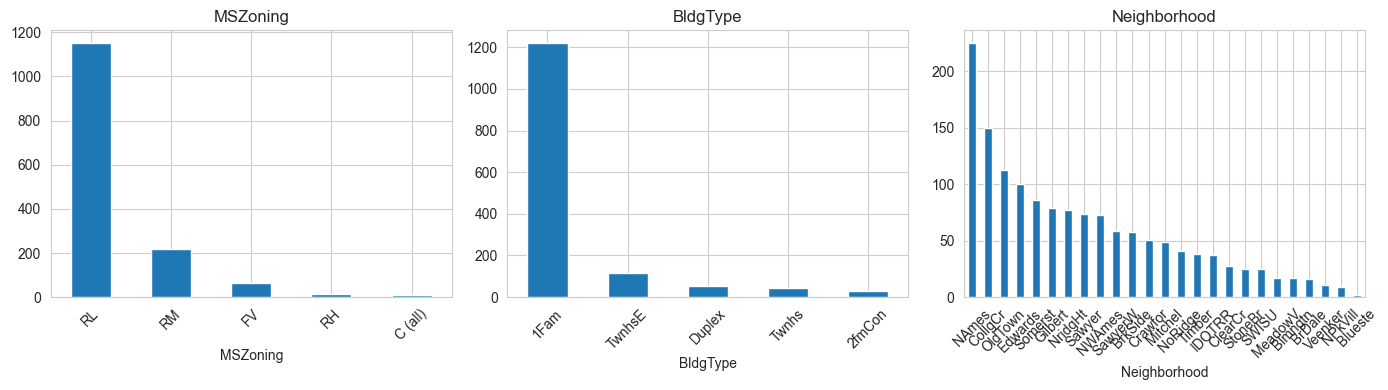

In [18]:
# Bar plots for important nominal vars
fig, axes = plt.subplots(1, 3, figsize=(14, 4))
for ax, col in zip(axes, ['MSZoning', 'BldgType', 'Neighborhood']):
    if col in df.columns:
        df[col].value_counts().plot(kind='bar', ax=ax)
        ax.set_title(col)
        ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

In [19]:
# Ordinal features (Ex > Gd > TA > Fa > Po)
ordinal_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'KitchenQual', 'GarageQual', 'GarageCond', 'HeatingQC', 'FireplaceQu']
ordinal_cols = [c for c in ordinal_cols if c in df.columns]
print('Ordinal columns to encode (Ex > Gd > TA > Fa > Po):')
for c in ordinal_cols:
    print(f"  {c}: {df[c].dropna().unique()[:8].tolist()}")

Ordinal columns to encode (Ex > Gd > TA > Fa > Po):
  ExterQual: ['Gd', 'TA', 'Ex', 'Fa']
  ExterCond: ['TA', 'Gd', 'Fa', 'Po', 'Ex']
  BsmtQual: ['Gd', 'TA', 'Ex', 'Fa']
  BsmtCond: ['TA', 'Gd', 'Fa', 'Po']
  KitchenQual: ['Gd', 'TA', 'Ex', 'Fa']
  GarageQual: ['TA', 'Fa', 'Gd', 'Ex', 'Po']
  GarageCond: ['TA', 'Fa', 'Gd', 'Po', 'Ex']
  HeatingQC: ['Ex', 'Gd', 'TA', 'Fa', 'Po']
  FireplaceQu: ['TA', 'Gd', 'Fa', 'Ex', 'Po']


## Phase 5: Relationships with SalePrice

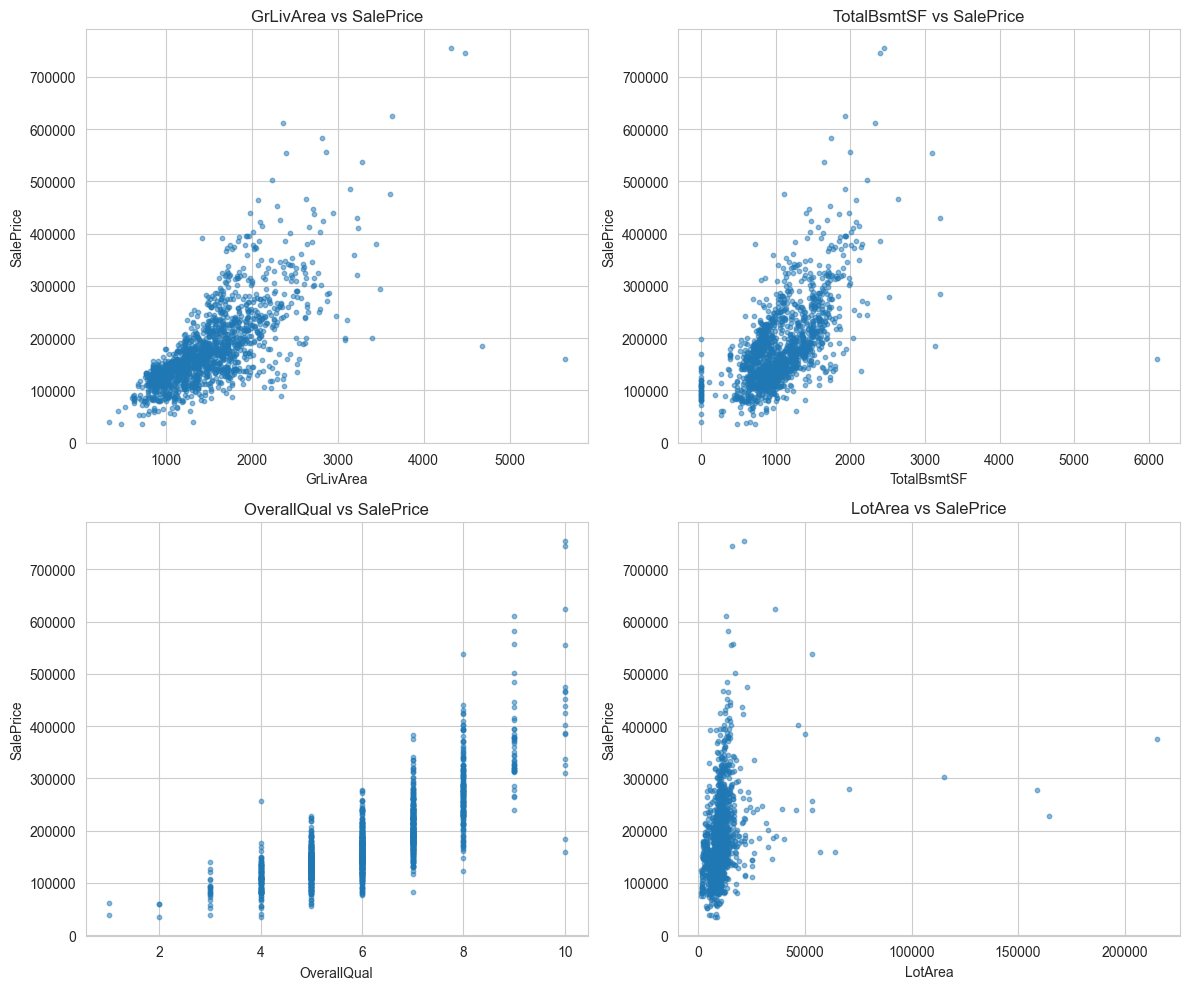

In [20]:
# Scatter: key numeric vs SalePrice
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
for ax, col in zip(axes, ['GrLivArea', 'TotalBsmtSF', 'OverallQual', 'LotArea']):
    if col in df.columns:
        ax.scatter(df[col], df['SalePrice'], alpha=0.5, s=10)
        ax.set_xlabel(col)
        ax.set_ylabel('SalePrice')
        ax.set_title(f'{col} vs SalePrice')
plt.tight_layout()
plt.show()

In [21]:
# Top 10-15 numeric predictors (by correlation)
print('Top 15 numeric predictors by correlation with SalePrice:')
print(sale_corr.head(15).to_string())

Top 15 numeric predictors by correlation with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799


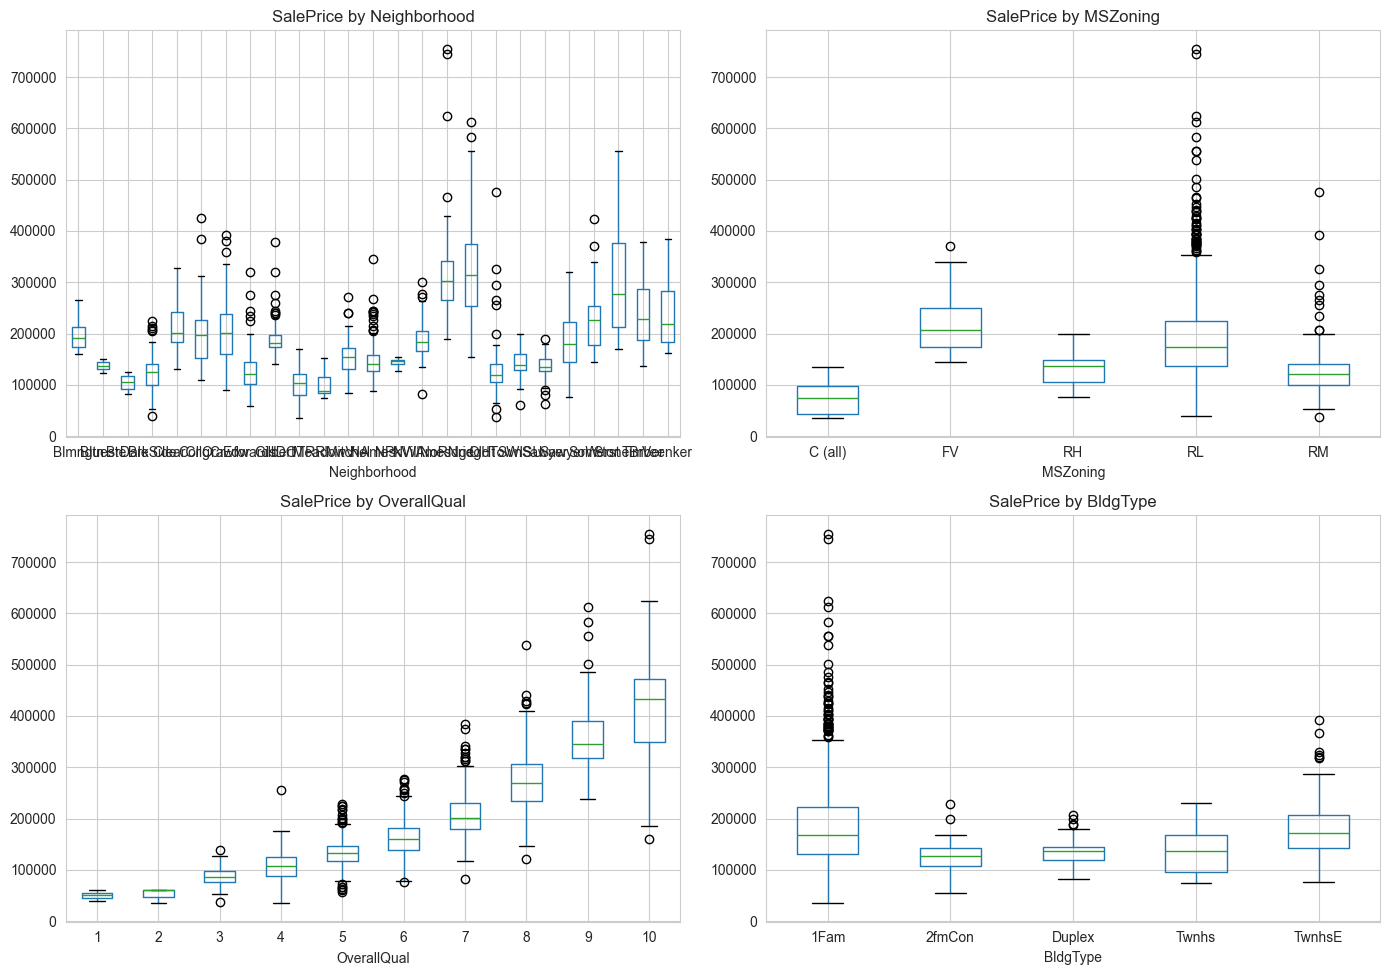

In [22]:
# Box plots: categorical vs SalePrice
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
for ax, col in zip(axes.flatten(), ['Neighborhood', 'MSZoning', 'OverallQual', 'BldgType']):
    if col in df.columns:
        df.boxplot(column='SalePrice', by=col, ax=ax)
        ax.set_title(f'SalePrice by {col}')
        ax.set_xlabel(col)
        plt.suptitle('')
plt.tight_layout()
plt.show()

In [23]:
# Mean SalePrice by category for high-impact variables
for col in ['Neighborhood', 'MSZoning', 'OverallQual']:
    if col in df.columns:
        means = df.groupby(col)['SalePrice'].mean().sort_values(ascending=False)
        print(f'Mean SalePrice by {col}:')
        print(means.head(8).to_string())
        print()

Mean SalePrice by Neighborhood:
Neighborhood
NoRidge    335295.317073
NridgHt    316270.623377
StoneBr    310499.000000
Timber     242247.447368
Veenker    238772.727273
Somerst    225379.837209
ClearCr    212565.428571
Crawfor    210624.725490

Mean SalePrice by MSZoning:
MSZoning
FV         214014.061538
RL         191004.994787
RH         131558.375000
RM         126316.830275
C (all)     74528.000000

Mean SalePrice by OverallQual:
OverallQual
10    438588.388889
9     367513.023256
8     274735.535714
7     207716.423197
6     161603.034759
5     133523.347607
4     108420.655172
3      87473.750000



## Phase 6: Preprocessing and Modeling Takeaways

### Summary and Recommendations

**Columns to drop:**
- `Id` (identifier, not predictive)
- Columns with very high missing % (e.g. PoolQC, MiscFeature, Alley, Fence) – either drop or treat "missing" as a category

**Imputation strategy:**
- Numeric: median for LotFrontage; 0 or median for GarageYrBlt when no garage; 0 for MasVnrArea when None
- Categorical: "None" or "NA" for semantic missing (no alley, no pool, etc.)

**Encoding:**
- Ordinal (ExterQual, BsmtQual, KitchenQual, etc.): map Ex=5, Gd=4, TA=3, Fa=2, Po=1, NA/None=0
- Nominal: OneHotEncoding or TargetEncoding for high-cardinality (e.g. Neighborhood)

**Target transform:**
- Use `np.log1p(SalePrice)` for training to handle right skew; inverse transform for predictions

**Outliers:**
- Review extreme GrLivArea or LotArea with moderate price; consider capping or removal

**Feature engineering:**
- Total bathrooms = FullBath + 0.5*HalfBath + BsmtFullBath + 0.5*BsmtHalfBath
- Total SF = GrLivArea + TotalBsmtSF (or use GrLivArea as main)
- Age = YrSold - YearBuilt, RemodAge = YrSold - YearRemodAdd
- HasGarage, HasPool, HasFireplace (binary from NA/missing)